In [56]:
import pandas as pd
from google.colab import files

In [57]:
uploaded=files.upload()

Saving data2.csv to data2 (3).csv


In [58]:
#df=pd.read_csv('data1.csv')
df=pd.read_csv('data2.csv')
df.head()

,X1,X2,Y
0,49,43,1
1,74,0,0
2,86,51,0
3,3,66,1
4,33,54,1


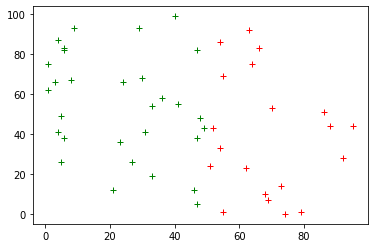

In [59]:
import matplotlib.pyplot as plt

X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
Y=df['Y'].values.tolist()

plt.figure()

for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i],'r+')
    else:
        plt.plot(X1[i],X2[i],'g+')

plt.show()

In [74]:
import random
import math
from IPython import display 
from scipy.signal import savgol_filter

In [75]:
W=[random.random(), random.random()]
b=random.random()
lr=0.01
theta=0.5
epoch=0
count=0

loss=[]

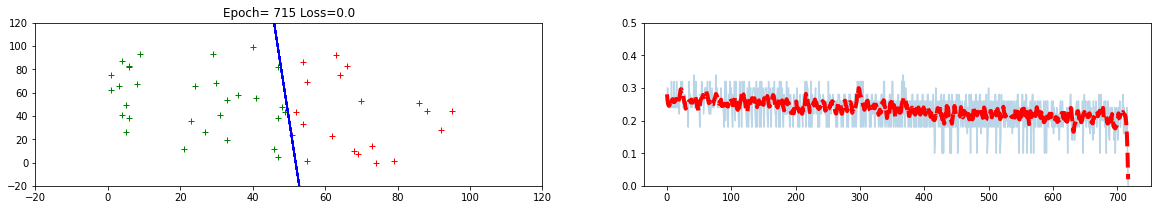

In [78]:
while count<len(Y):

  total_error=0
  for i in range(len(Y)):
    ws=W[0]*X1[i]+W[1]*X2[i]+b
    pred=0
    if ws>theta:
      pred=1

    error=Y[i]-pred
    if error!=0:
      count=0
      total_error+=math.sqrt(error**2) 
      W[0]+=error*X1[i]*lr
      W[1]+=error*X2[i]*lr
      b+=error*lr
    else:
      count+=1

  loss.append(1/len(X1)*total_error)
  plt.figure(figsize=(20,3))
  plt.subplot(1,2,1)
  display.clear_output(wait=True)
  for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i],'r+')
    else:
        plt.plot(X1[i],X2[i],'g+')

    plt.xlim([-20,120])
    plt.ylim([-20,120])
    
    xint=(theta-b)/W[0] 
    yint=(theta-b)/W[1] 
    slope=-yint/xint 
    x=plt.xlim()
    y=[]
    for i in x:
      y.append(slope*i+yint)
    
    plt.plot(x,y,'b-')

  plt.title(f"Epoch= {epoch} Loss={loss[-1]}")
  plt.subplot(1,2,2)
  plt.plot(loss,alpha=0.3)
  if epoch>10:
    avg=savgol_filter(loss,11,3)
    plt.plot(avg,'r--', lw=4 )


  plt.ylim([0,.5])


  plt.show()
  
  epoch+=1